# Module 1 Assignment: Analyzing Tech Industry Jobs and Companies

Welcome to this module's assignment!

Carefully read each Markdown (text) cell, which includes instructions and hints. Start by reading the background behind your upcoming tasks.

When you are done, submit your solution by saving it, then clicking on the blue submit button at the top of the page.

## Background:

As a data analyst at a tech recruitment firm, you need to gather and analyze data about tech companies and their job postings to identify industry trends and opportunities. This analysis will help inform both hiring companies and job seekers about market conditions.

You will start by collecting data on the largest tech companies by revenue by scraping data from a Wikipedia-like webpage. Then, you will gather information from tech job postings, extracting data from a job search engine.

## In order for your submission to be graded correctly, you **MUST**:

* **Use the provided variable names**, otherwise the autograder will not be able to locate the variable for grading. 

* **Replace any instances of `None` with your own code.** 

* **Only modify the cells that start with the comment `# GRADED CELL`**.  

* **Use the provided cells for your solution.** You can add new cells to experiment, but these will be omitted when grading. 

To submit your solution, save it, then click on the blue `Submit assignment` button at the top of the page.

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important notes</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 



## Table of Contents

- [Step 1: Importing Libraries](#step-1)
- [Step 2: Biggest Tech Companies](#step-2)
    - [Exercise 1: Scraping the Tables](#ex1)
    - [Exercise 2: Inspecting the Tables](#ex2)
    - [Exercise 3: Cleaning Column Names](#ex3)
    - [Exercise 4: Cleaning Columns](#ex4)
    - [Exercise 5: Extracting Cities](#ex5)
- [Step 3: Analyzing Job Postings](#step-3)
    - [Exercise 6a: Getting the HTML code](#ex6a)
    - [Exercise 6b: Getting Job Listings](#ex6b)
    - [Exercise 7: Extracting Information from HTML](#ex7)
    - [Exercise 8: Dates](#ex8)
    - [Exercise 9: Number of Benefits](#ex9)

<a id="step-1"></a>

## Step 1: Importing libraries

Start by importing all the libraries you will need for your tasks.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Run the cell below to import <code>pandas</code>, <code>requests</code>, <code>BeautifulSoup</code>, <code>re</code>,  and <code>matplotlib</code> libraries.</li>
        </ol>
</div>

In [1]:
# 🔒This cell is locked. You will not be able to edit it.

import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

<a id="step-2"></a>

## Step 2: Biggest Tech Companies

To effectively match tech companies with potential candidates, your firm needs reliable data on the industry"s biggest players. Companies with over $100B in revenue typically offer higher compensation packages, making this revenue data crucial for advising both hiring companies and job seekers about competitive salary ranges.
<a id="ex1"></a>

#### Exercise 1: Scape the tables

Since you"ve identified a website that stores the relevant data in HTML tables, you can use `pd.read_html()` to get reliable, up-to-date data.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Open the [🔗link](https://dlai-lc-dag.s3.us-east-2.amazonaws.com/list_of_largest_companies.html) to the webpage with information, and take a look at the tables
2. Scrape the tables using `pandas`
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To scrape the tables using pandas, you can use the function `pd.read_html()`
</ul>
</details>

In [2]:
# GRADED CELL: Exercise 1

url = "https://dlai-lc-dag.s3.us-east-2.amazonaws.com/list_of_largest_companies.html"

### START CODE HERE ###

tables = pd.read_html(url)

### END CODE HERE ###

In [3]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results 
if len(tables) > 0:
    print("Downloaded tables successfully")
else:
    print("Could not find any tables")

Downloaded tables successfully


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>
<small>

```mkdn
Downloaded tables successfully
```
</details>


<a id="ex2"></a>

#### Exercise 2: Inspect the Tables

Now, take a look at what you downloaded. How many tables did you expect to retrieve?
<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**

1. Count the number of tables in the `tables` variables
2. Inspect both tables using the `print` function. Print the first 5 rows of each table
3. Save the second table (index 1) in a new variable. You will be working on this one

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- `pd.read_html()` returns a list of DataFrames, so you can use functions you already know to find the length of a list.
- To inspect the tables, you can iterate over the list of DataFrames. Then, in iteration you can use the `head()`method to get the first 5 rows.
- In case you’re wondering, the `"\n\n"` in the print statement inserts two blank lines, which improves readability.
</ul>
</details>

In [4]:
# GRADED CELL: Exercise 2

### START CODE HERE ###

# count the number of tables
num_tables = len(tables)

# print the first 5 rows of each table
for i, table in enumerate(tables):
    print(f"Table {i}:\n", table.head(), "\n\n")

# save the table at index 1 to a new dataframe
tech_companies = tables[1]

### END CODE HERE ###

Table 0:
          Column                                        Explanation
0          Rank                         Rank of company by revenue
1       Company                  Name of the international company
2       Revenue  The revenue of the company in billions of USDs...
3     Employees                     Number of employees of company
4  Headquarters                 Location of company's headquarters 


Table 1:
                Company Revenue ($B) USD[2]  Employees[2] Country (origin)  \
0               Amazon              $574.8       1525000               US   
1                Apple             $394.33        164000               US   
2             Alphabet             $282.84        190234               US   
3  Samsung Electronics             $234.13        270372      South Korea   
4              Foxconn             $222.54        767062           Taiwan   

                                    Headquarters  
0  Seattle, Washington & Arlington, Virginia, US  
1         

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
         Column                                        Explanation
0          Rank                         Rank of company by revenue
1       Company                  Name of the international company
2       Revenue  The revenue of the company in billions of USDs...
3     Employees                     Number of employees of company
4  Headquarters                 Location of company's headquarters 


               Company Revenue ($B) USD[2]  Employees[2] Country (origin)  \
0               Amazon              $574.8       1525000               US   
1                Apple             $394.33        164000               US   
2             Alphabet             $282.84        190234               US   
3  Samsung Electronics             $234.13        270372      South Korea   
4              Foxconn             $222.54        767062           Taiwan   

                                    Headquarters  
0  Seattle, Washington & Arlington, Virginia, US  
1                      Cupertino, California, US  
2                  Mountain View, California, US  
3                             Suwon, South Korea  
4                        New Taipei City, Taiwan   
```

</small>
</details>

<a id="ex3"></a>

#### Exercise 3: Clean Column Names
Your dashboard needs consistent column names. Your next task is to clean up the messy column names from Wikipedia to create a standardized format that your frontend developers can rely on.

Before any processing, and for grading purposes, you will begin by creating a copy of the `tech_companies` DataFrame, and saving it into a variable named `tech_companies_clean`. All following exercises should be applied to this new DataFrame.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Rename the columns of the table: 

    | Old Names | New Names | 
    |-----------|-----------|
    | Company   |   company |
    | Revenue ($B) USD[2] | revenue_usd_billions |
    | Employees[2] | employee_count |
    | Country (origin) | country | 
    | Headquarters | headquarters|

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To rename the columns you can call the `columns` attribute for DataFrames, and set it to the list of new column names.
</ul>
</details>


In [5]:
# GRADED CELL: Exercise 3

# create a copy of the dataframe (for grading purposes only)
tech_companies_clean = tech_companies.copy()

### START CODE HERE ###

# define a list with the new column names
new_column_names = [
    "company",
    "revenue_usd_billions",
    "employee_count",
    "country",
    "headquarters"
]

# rename the columns
tech_companies_clean.columns = new_column_names

### END CODE HERE ###

In [6]:
# 🔒This cell is locked. You will not be able to edit it.

# check that the changes have been made
print(tech_companies_clean.columns)

Index(['company', 'revenue_usd_billions', 'employee_count', 'country',
       'headquarters'],
      dtype='object')


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
Index(['company', 'revenue_usd_billions', 'employee_count', 'country',
       'headquarters'],
      dtype="object")
```
</small>
</details>

This is a good time to check the data types of the columns

In [7]:
# 🔒This cell is locked. You will not be able to edit it.

tech_companies_clean.dtypes

company                 object
revenue_usd_billions    object
employee_count           int64
country                 object
headquarters            object
dtype: object

<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
company                 object
revenue_usd_billions    object
employee_count           int64
country                 object
headquarters            object
dtype: object
```
</small>
</details>

As you can see, the revenue column is marked as `object`, when you would like it to be a number.
<a id="ex4"></a>

#### Exercise 4: Cleaning Columns

Revenue figures help predict a company's compensation potential. Clean the revenue data by removing currency symbols, and converting it to numeric values.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Remove the currency signs ($) from the `"revenue_usd_billions"` column
2. Convert the column type to `Float64`
</div>

<details closed>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- One way to remove the "$" sign is to use `.str.replace()` method. The arguments for this function are the string you want to replace, and what you want to replace it with. 
- To cast the column as a `"Float64"` you can use the `.astype()` method
- None of these methods work in-place, so you need to overwrite the original column for changes to stick.

</ul>
</details>


In [8]:
# GRADED CELL: Exercise 4

### START CODE HERE ###

# Remove currency signs and any non-numeric characters except dot and minus
tech_companies_clean["revenue_usd_billions"] = tech_companies_clean["revenue_usd_billions"].replace(
    r"[^0-9.\-]", "", regex=True
)

# Convert revenue to numeric type
tech_companies_clean["revenue_usd_billions"] = pd.to_numeric(
    tech_companies_clean["revenue_usd_billions"], errors="coerce"
)


### END CODE HERE ###

In [9]:
# 🔒This cell is locked. You will not be able to edit it.

# check the data type of the `revenue_usd_billions` column
print("revenue_usd_billions dtype:", tech_companies_clean["revenue_usd_billions"].dtype)
# check the first values in the `revenue_usd_billions` column
print("First values:")
print(tech_companies_clean["revenue_usd_billions"][:5])

revenue_usd_billions dtype: float64
First values:
0    574.80
1    394.33
2    282.84
3    234.13
4    222.54
Name: revenue_usd_billions, dtype: float64


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn

venue_usd_billions dtype: float64
First values:
0    574.80
1    394.33
2    282.84
3    234.13
4    222.54
Name: revenue_usd_billions, dtype: float64
```

</small>
</details>

Now that you have cast the data as a numeric type, you can analyze it further. Run the next two cells to find the distribution of the revenues, as well as the correlation between the revenue and the number of employees

Text(0.5, 1.0, 'Distribution of revenues')

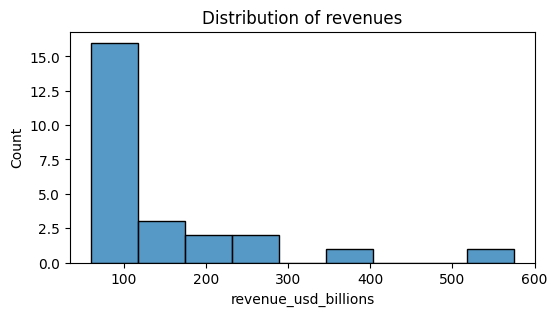

In [10]:
# 🔒This cell is locked. You will not be able to edit it.

# Find the distribution of the revenues
plt.figure(figsize=(6, 3))
sns.histplot(tech_companies_clean["revenue_usd_billions"])
plt.title("Distribution of revenues")

Pearson correlation between revenue and employee count: 0.6759066446985412


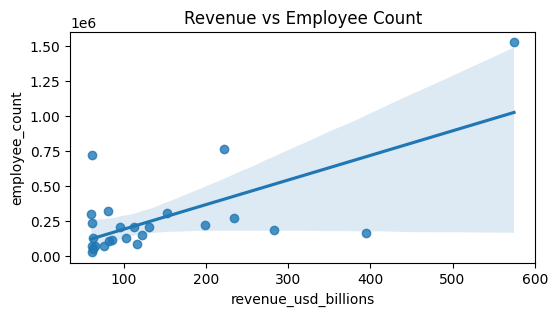

In [11]:
# 🔒This cell is locked. You will not be able to edit it.

plt.figure(figsize=(6,3))
sns.regplot(data=tech_companies_clean, x="revenue_usd_billions", y="employee_count")
plt.title("Revenue vs Employee Count")

# print the Pearson correlation
print("Pearson correlation between revenue and employee count:", 
      tech_companies_clean["revenue_usd_billions"].corr(tech_companies_clean["employee_count"]))

<a id="ex5"></a>

#### Exercise 5: Extracting Cities
Knowing where major tech companies are located helps focus recruitment efforts. Help recruiters fo their jobs more efficiently by adding a new column called "city".

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Get the city name from the `"headquarters"` column using `.str.split()` method
2. Add it as a new column to the `tech_companies_clean` DataFrame
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">

- You can use the `str.split()` method to break the `headquarters` strings into a list. The delimiter is a comma.
- The city is the first string so you can use `str[0]` after the `str.split()` method.

</ul>
</details>


In [12]:
# GRADED CELL: Exercise 5

### START CODE HERE ###

tech_companies_clean["city"] = tech_companies_clean["headquarters"].str.split(",").str[0].str.strip()

### END CODE HERE ###

In [13]:
# 🔒This cell is locked. You will not be able to edit it.

# print the results
print(tech_companies_clean["city"])

0             Seattle
1           Cupertino
2       Mountain View
3               Suwon
4     New Taipei City
5             Redmond
6             Beijing
7     Yuhang District
8              Dallas
9          Menlo Park
10               Bonn
11         Round Rock
12           Shenzhen
13              Tokyo
14           Shenzhen
15              Tokyo
16    New Taipei City
17              Seoul
18        Santa Clara
19          Palo Alto
20          Hong Kong
21              Osaka
22             Dublin
23        Santa Clara
24             Armonk
Name: city, dtype: object


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
0             Seattle
1           Cupertino
2       Mountain View
3               Suwon
4     New Taipei City
5             Redmond
6             Beijing
7     Yuhang District
8              Dallas
9          Menlo Park
10               Bonn
11         Round Rock
12           Shenzhen
13              Tokyo
14           Shenzhen
15              Tokyo
16    New Taipei City
17              Seoul
18        Santa Clara
19          Palo Alto
20          Hong Kong
21              Osaka
22             Dublin
23        Santa Clara
24             Armonk
Name: city, dtype: object
```

</small>
</details>

<a id="step-3"></a>

## Step 3: Analyzing Job Postings
As a recruitment firm, analyzing job postings helps you spot hiring trends and advise clients. You can track who’s hiring, what benefits they offer, and where, revealing patterns like which regions offer better perks or a rise in tech roles.

<a id="ex6a"></a>

#### Exercise 6a: Getting the HTML Code with Job Postings
As a modern recruiting firm, you want to automatically gather job postings from various online sources. Your first task is to access tech job listings from [🔗this webpage](https://dlai-lc-dag.s3.us-east-2.amazonaws.com/jobs.html).

Before scraping the data, open the [🔗webpage](https://dlai-lc-dag.s3.us-east-2.amazonaws.com/jobs.html), right-click anywhere on the page, and choose "Inspect" to take a look at the HTML code behind the site. You should see something like this:

<div style="text-align: center">
  <img src="imgs/inspection.png" >
</div>

As you can see from the screenshot, each job listing is wrapped in a `<div>` with the class `base-search-card_info`. This container holds various elements that describe the job post. Here are the key parts you can extract:

- **`<h3 class="base-search-card_title">`**: Contains the job title (e.g., *Field Sales Engineer*).
- **`<h4 class="base-search-card_subtitle">`**: Contains the company name (e.g., *Lenovo*).
- **`<span class="job-search-card_location">`**: Specifies the job location (e.g., *Colorado, United States*).
- **`<span class="job-posting-benefits_text">`**: This contains benefits, like health insurance or the possibility to be an early applicant
- **`<p class="list-date">`**: Indicates the date the job was posted.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Open the [🔗webpage](https://dlai-lc-dag.s3.us-east-2.amazonaws.com/jobs.html) and inspect the HTML code
2. Send a GET request to the provided URL
3. Get the status code. If it is 200, then you know a response was successfully returned.
</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">

- You can send the GET request with the `get()` function from the `requests` library
- To check the status of the request, use the `status_code` attribute
</ul>
</details>


In [14]:
# GRADED CELL: Exercise 6a

# define the url
url = "https://dlai-lc-dag.s3.us-east-2.amazonaws.com/jobs.html"

### START CODE HERE ###

# send a GET request to the url
response = requests.get(url)

# get the status of the response for troubleshooting
status = response.status_code
### END CODE HERE ###

In [15]:
# 🔒This cell is locked. You will not be able to edit it.

# print the status code
print(status)

200


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
200
```

</small>

</details>

<a id="ex6b"></a>

#### Exercise 6b: Getting the Job Listings 
If the request worked correctly, you are ready to transform it into a structured format that you can search through more easily.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Parse the HTML content using BeautifulSoup

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To parse the data, you can call `BeautifulSoup` on the content of the html response
</ul>
</details>


In [16]:
# GRADED CELL: Exercise 6b

### START CODE HERE ###

# parse the content with BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

### END CODE HERE ###

In [17]:
# 🔒This cell is locked. You will not be able to edit it.

# print the first characters of soup
print(soup.prettify()[:400])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Job Listings
  </title>
  <link href="styles_jobs.css" rel="stylesheet"/>
 </head>
 <body>
  <header>
   <h1>
    Job Marketplace
   </h1>
   <p>
    Welcome to the Job Marketplace. Explore various job listings and find your next career opportuni


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Job Listings
  </title>
  <link href="styles_jobs.css" rel="stylesheet"/>
 </head>
 <body>
  <header>
   <h1>
    Job Marketplace
   </h1>
   <p>
    Welcome to the Job Marketplace. Explore various job listings and find your next career opportuni
```

</small>

</details>

<a id="ex7"></a>

#### Exercise 7: Extracting Information from HTML
Now that you have structured data, we can use it to pull out the specific pieces of information the recruiters need: job titles, company names, locations, benefits, and when it was listed. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Based on the description at the beginning of [Exercise 6a](#ex6a), listing above extract each of the data from each job posting. Use the following table


</div>
If you have any doubts as to which element-class pairs to use in each step, look at the hints below.

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To find each individual job posting, look for the element `"div"` and class `"base-search-card__info"`
- To find all the job listings, you can use the `find_all()` method. You need to pass the element, followed by the argument `class_` with the class you are looking for
- To extract data from each job posting, you can use this table:

    | Feature | Element | Class| 
    | --------|---------|-----|
    | job_title | "h3" | "base-search-card_title"|
    |company | "h4" | "base-search-card_subtitle"|
    |location | "span" | "job-search-card_location" |
    |list_date | "p"| "list-date"|

- Inside the `for` loop, use the `.find()` method to get each individual data (job title, company, location, benefits, and listing date)
</ul>
</details>


In [18]:
# GRADED CELL: Exercise 7

# get all the job listings
job_listings = soup.find_all("div", class_="base-search-card_info")


jobs = []
for job in job_listings:
    
    ### START CODE HERE ###
    
    # find the job title
    job_title = job.find("h3", class_="base-search-card_title").text.strip()
    
    # find the company name 
    company = job.find("h4", class_="base-search-card_subtitle").text.strip()

    # find the location
    location = job.find("span", class_="job-search-card_location").text.strip()

    # find the listing date
    list_date = job.find("p", class_="list-date").text.strip()
    
    ### END CODE HERE ###

    # append the list of fields to the list of jobs
    jobs.append([job_title, company, location, list_date])
    
# create a DataFrame from the list of jobs
jobs_df = pd.DataFrame(jobs, columns=["job_title", "company", "location", "list_date"]) 

In [19]:
# 🔒This cell is locked. You will not be able to edit it.

# print the first results
jobs_df.head()

,job_title,company,location,list_date
0,"Content Editor, IBM Think",IBM,"New York, NY",2024-12-29
1,2025 Intern – IBM Product Marketing,IBM,"New York, NY",2025-01-07
2,"Content Editor, IBM Think",IBM,"New York, NY",2024-12-30
3,Software Engineer - Frontend,LinkedIn,"Mountain View, CA",2025-01-09
4,Software Engineer - January 2025,Creyos,United States,Oct 10 2024


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgs/ex7.png" width="550"/>


</details>

Next, use the `dtypes` attribute to check if the data types of the columns make sense

In [20]:
print(jobs_df.dtypes)

job_title    object
company      object
location     object
list_date    object
dtype: object


<a id="ex8"></a>

#### Exercise 8: Dates
All columns seem to be `object` type, so the content is treated as strings. This strategy works for all columns except for `list_date`, which should be a datetime. Also, as you can see from inspecting the dataset, some dates have a different format. 

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Convert the `"list_date"` column to a datetime data type. 
2. Extract the name of the day of the week  from the date and add it as a new column to the DataFrame (code is given)
3. Check that all the dates show up with the same format (code is given)

</div>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
If you are stuck, click here for extra hints!</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
- To convert the `"list_date"` column to datetime, you can use the `pd.to_datetime()` function. You will need to pass the column you want to convert, and (in this case) the argument `format="mixed"`   
- To access the data types for the print statement, use the `.dtypes` attribute
</ul>
</details>

In [21]:
# GRADED CELL: Exercise 8

### START CODE HERE ###

# convert the list_date column to datetime. Original dates have different formats,
# so use the "mixed" format to parse them
jobs_df["list_date"] = pd.to_datetime(jobs_df["list_date"], format="mixed")

### END CODE HERE ###

# extract the day of the week from the list_date column
jobs_df["day_of_week"] = jobs_df["list_date"].dt.day_name()

# print the the data types of the columns to check the conversion
print(jobs_df.dtypes)

job_title              object
company                object
location               object
list_date      datetime64[ns]
day_of_week            object
dtype: object


<details>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<small>

```mkdn
job_title              object
company                object
location               object
list_date      datetime64[ns]
day_of_week            object
dtype: object
```
</small>

</details>

Now that you have the day of the week of each posting, you can analyze if there is any days where postings happen more often. 

Run the cell below to get a column chart with the information

Text(0.5, 1.0, 'Number of job listings per day of the week')

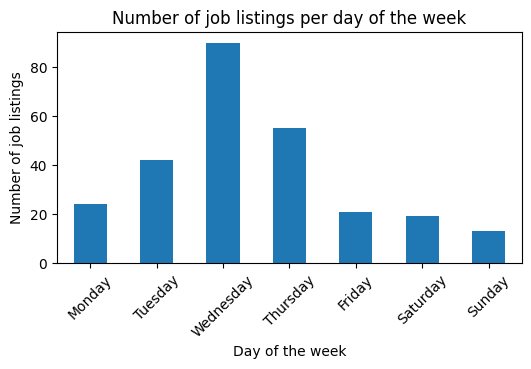

In [22]:
# 🔒This cell is locked. You will not be able to edit it.

# Count the number of job listings per day of the week
jobs_per_day = jobs_df["day_of_week"].value_counts()
# Sort the results so you get Monday-Sunday
jobs_per_day = jobs_per_day[["Monday", "Tuesday", "Wednesday", 
                             "Thursday", "Friday", "Saturday", "Sunday"]]

# create the column chart
# set the figure size
plt.figure(figsize=(6, 3)) 
# generate the plot
jobs_per_day.plot(kind="bar")
# rotate the x-axis labels
plt.xticks(rotation=45)
# set the x-axis label
plt.xlabel("Day of the week")
# set the y-axis label
plt.ylabel("Number of job listings")
# set the title
plt.title("Number of job listings per day of the week")

Congratulations on finishing this graded lab! If everything is running correctly, you can go ahead and submit your code for grading.